# Reliability and Data quality (1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from random import *

# still to do

In [2]:
# Load our dataset into memory

df = pd.read_csv("speeches/data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\n \n \nMadam Speaker, Mr. Vice Pres...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\n \n Chief Justice Roberts, Preside...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\n \n Mr. Speaker, Mr. Vice Presiden...",State of the Union,Democrat


In [4]:
# Does the number of data point match our expectation?
print(df.shape)

(108, 6)


In [5]:
# The dataframe has 108 rows which corresponds to 108 State of the Union + Inaugural Address Speeches
# The Name,Date,Speech,Type and Party columns do exist as foressen.

In [6]:
# Visualizing a random sample of rows of df

df.sample(3)

,Unnamed: 0,Name,Date,Speech,Type,Party
57,57,Lyndon B. Johnson,"January 20, 1965",\n \n My fellow countrymen:\nOn this...,Inaugural Address,Democrat
15,15,George W. Bush,"February 02, 2005","\n \n Mr. Speaker, Vice President Ch...",State of the Union,Republican
51,51,Richard M. Nixon,"January 22, 1971","\n \n Mr. Speaker, Mr. President, my...",State of the Union,Republican


In [7]:
# Visualizing the content of three random speeches (which are only shown partially above):

for i in [1,2,3]:
    print(df.loc[randint(0, 107)]["Speech"])

Fellow-Citizens: 

We stand to-day upon an eminence which overlooks a hundred years of national life--a century crowded with perils, but crowned with the triumphs of liberty and law. Before continuing the onward march let us pause on this height for a moment to strengthen our faith and renew our hope bya glance at the pathway along which our people have traveled. 

It is now three days more than a hundred years since the adoption of the first written constitution of the United States--the Articles of Confederation and Perpetual Union. The new Republic was then beset with danger on every hand. It had not conquered a place in the family of nations. The decisive battle of the war for independence, whose centennial anniversary will soon be gratefully celebrated at Yorktown, had not yet been fought. The colonists were struggling not only against the armies of a great nation, but against the settled opinions of mankind; for the world did not then believe that the supreme authority of governm

In [8]:
# Content of the speeches looks fine and complete!

In [9]:
## Count Nan values
df.apply(lambda x: x.isna().sum())

Unnamed: 0    0
Name          0
Date          0
Speech        0
Type          0
Party         0
dtype: int64

In [10]:
# No Nan values in Name,Date,Speech, Type and Party!

In [11]:
# Inspecting the length of the speeches

length = []

for i in range(0,107):
    print(len(df.loc[i]["Speech"]))
    length.append(len(df.loc[i]["Speech"]))

print("Shortest speech:")
print(min(length))

30686
30237
8399
35236
40282
40027
41225
12427
42219
41713
41914
13340
33728
31854
31392
29834
11969
30587
31873
22605
8974
52328
43549
42211
38884
36314
51188
42032
28550
23238
21387
12486
28360
22080
20205
25109
14599
29473
33012
30925
13716
20185
19693
26623
6880
28354
29707
24825
29190
9925
23063
25742
25353
11531
46993
57600
83226
8075
31628
39060
7539
13917
13599
3005
26178
7591
10566
11015
26273
36484
28940
68731
22995
23614
20242
8300
9451
31713
5493
13244
23324
12175
25863
9999
17774
14715
7618
6403
3922
20999
16574
19793
6608
28703
49702
23390
7028
6806
17725
26305
19867
7148
6997
13221
10376
13873
792
Shortest speech:
792


In [12]:
# Taking the shortest speech (row 107): 

df.loc[107]["Speech"]

# and verifying with the text on millercenter.org website:
# https://millercenter.org/the-presidency/presidential-speeches/april-30-1789-first-inaugural-address

'Fellow Citizens of the Senate and the House of Representatives: Among the vicissitudes incident to life, no event could have filled me with   greater anxieties than that of which the notification was transmitted by your   order, and received on the fourteenth day of the present month. On the one hand,   I was summoned by my Country, whose voice I can never hear but with veneration   and love, from a retreat which I had chosen with the fondest predilection, and,   in my flattering hopes, with an immutable decision, as the asylum of my declining   years: a retreat which was rendered every day more necessary as well as more   dear to me, by the addition of habit to inclination, and of frequent interruptions   in my health to the gradual waste committed on it by time. On the other hand,   the magnitude and difficulty of the trust to which the voice of my Country called   me, being sufficient to awaken in the wisest and most experienced of her citizens,   a distrustful scrutiny into his qu

In [ ]:
# -> both texts are identical!

# Reliability and Data quality (2)

In [13]:
# Load the LOG

log_df = pd.read_csv('log_sotu.csv',sep=';') # load the ;-separated log 

In [14]:
# Convert the time column 't' to datetime 
#log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

C:\Users\fleig\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Scraping progress')

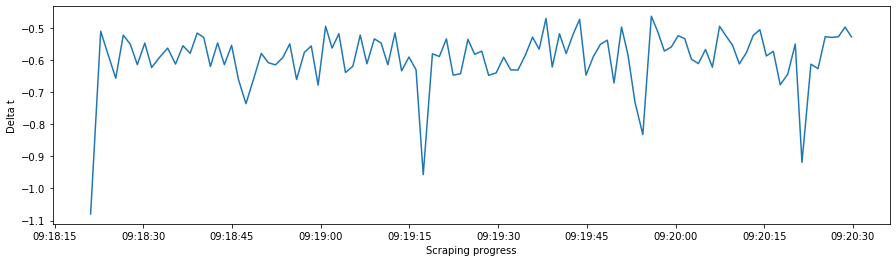

In [15]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.ylabel('Delta t')
plt.xlabel('Scraping progress')

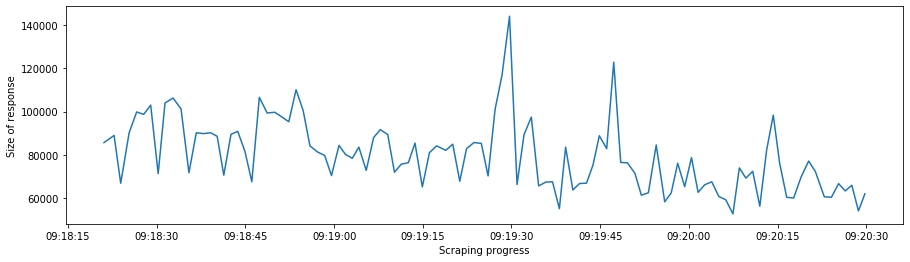

In [16]:
# Plot the response size over time.
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.plot(log_df.dt,log_df.response_size)

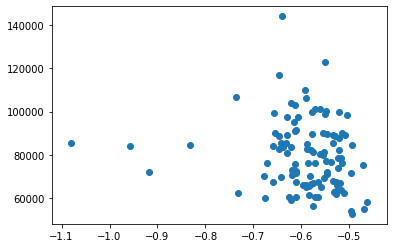

In [17]:
# Plot the delta_t against the response_size. These two should correlate pretty well.
plt.scatter(log_df.delta_t,log_df.response_size)

In [24]:
## Investigate errors
log_df.success.value_counts() ## Count errors

print(log_df.success.value_counts())

# all 108 downloads (all True) passed through successfully

## Groupby time
# round the time for aggregation
log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))

print(log_df.groupby('dt_hour').success.mean())



True    108
Name: success, dtype: int64
dt_hour
2019-08-24 09:00:00.000000004    True
2019-08-24 09:00:00.000000007    True
2019-08-24 09:00:00.000000018    True
2019-08-24 09:00:00.000000019    True
2019-08-24 09:00:00.000000033    True
2019-08-24 09:00:00.000000073    True
2019-08-24 09:00:00.000000076    True
2019-08-24 09:00:00.000000086    True
2019-08-24 09:00:00.000000090    True
2019-08-24 09:00:00.000000097    True
2019-08-24 09:00:00.000000169    True
2019-08-24 09:00:00.000000172    True
2019-08-24 09:00:00.000000186    True
2019-08-24 09:00:00.000000227    True
2019-08-24 09:00:00.000000228    True
2019-08-24 09:00:00.000000229    True
2019-08-24 09:00:00.000000235    True
2019-08-24 09:00:00.000000238    True
2019-08-24 09:00:00.000000249    True
2019-08-24 09:00:00.000000250    True
2019-08-24 09:00:00.000000268    True
2019-08-24 09:00:00.000000282    True
2019-08-24 09:00:00.000000283    True
2019-08-24 09:00:00.000000297    True
2019-08-24 09:00:00.000000303    True
20